In [322]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
 # what is this?
matplotlib.rcParams['figure.figsize'] = (12, 8) # adjust the configuration of the plots we will create

#read in the data
# df = pd.read_csv('C:\\Users\\niehu\\OneDrive - University of St. Thomas\\MsDS\\A0 - Projects\\Movie - Jupyter\\movies.csv')

df = pd.read_csv(r'C:\Users\niehu\OneDrive - University of St. Thomas\MsDS\A0 - Projects\Movie - Jupyter\movies.csv')


In [323]:
# let's look at the data
# df.head()

# check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}'.format(col, pct_missing))


name - 0.0
rating - 0.010041731872717789
genre - 0.0
year - 0.0
released - 0.0002608242044861763
score - 0.0003912363067292645
votes - 0.0003912363067292645
director - 0.0
writer - 0.0003912363067292645
star - 0.00013041210224308815
country - 0.0003912363067292645
budget - 0.2831246739697444
gross - 0.02464788732394366
company - 0.002217005738132499
runtime - 0.0005216484089723526


In [324]:
# shape
df.shape

(7668, 15)

In [325]:
#data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [326]:
# change data type of the budget column

# df['gross'] = df['gross'].astype('int64') error message: Cannot convert non-finite values (NA or inf) to integer

df['budget'] = df['budget'].astype('float')
df['gross'] = df['gross'].astype('float')

In [327]:
# convert the 'released' column to date and year only, create a new column for it.
# df['year'] = df['released'].str.split('(', expand=True)
# df['year'] = df['year'].astype(str).str[: -5]
#df['year'] = df['year'].str.split((',')[0], expand=True)
 
df['year'] = df['released'].apply(lambda x: str(x).split('(')[0].split(',')[-1])
df['year'] = df['year'].str.replace(r'\D', '')

df.dtypes
# apply(lambda x: str(x)


name         object
rating       object
genre        object
year         object
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [328]:
# to look at all data
# pd.set_option('display.max_rows', None) 

In [329]:
# drop duplicates
# df['company'].drop_duplicates().sort_values(ascending=False)

#df.drop_duplicates

#df

In [330]:
# df.dtypes

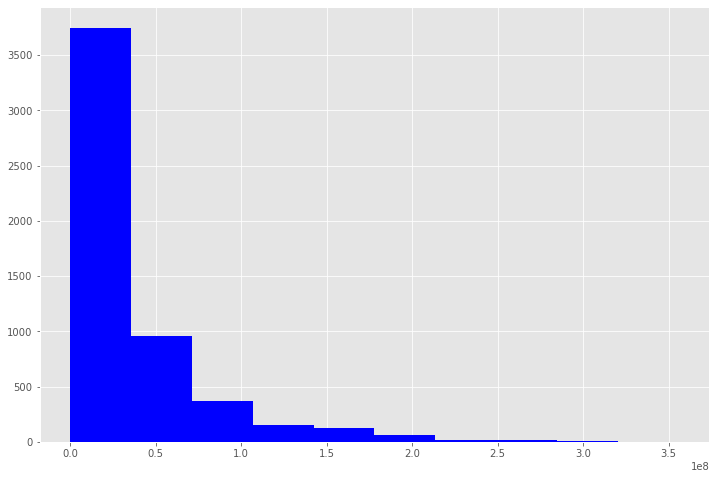

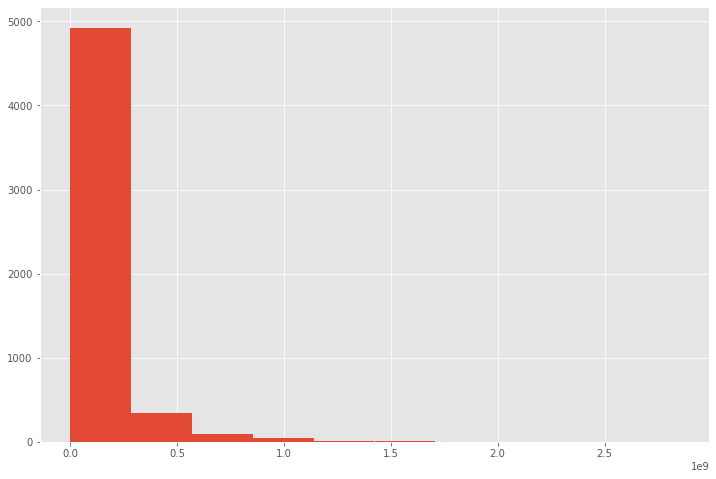

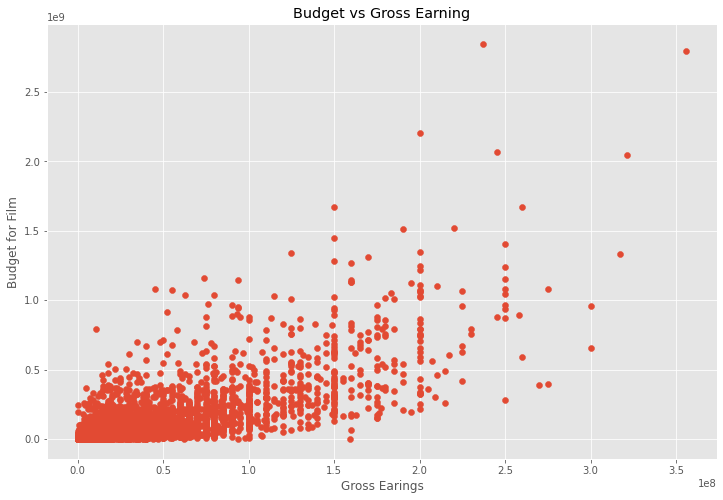

In [331]:
# Scatterplot between Budget and Gross
# company high correlation
# build a scatterplot with budget v.s. gross revenue


# df['budget'].isnull - This has treated all budgets as null.

# change data type of columns -- budget,gross  
# ValueError: Cannot convert non-finite values (NA or inf) to integer
# col is NULL so can't be transfer to int 

# df['budget'] = df['budget'].fillna(0).astype('int64')
# df['gross'] = df['gross'].fillna(0).astype('int64')
# df['votes'] = df['votes'].fillna(0).astype('int64')

df = df[pd.notnull(df['budget'])]
df = df[pd.notnull(df['gross'])]

plt.hist(df['budget'], color = 'blue')
plt.show()
plt.hist(df['gross'])
plt.show()


plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earings')
plt.ylabel('Budget for Film')
plt.show()


In [332]:
df.sort_values(by = ['gross'], inplace = False, ascending = False)
df.dtypes

name         object
rating       object
genre        object
year         object
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

<AxesSubplot:xlabel='budget', ylabel='gross'>

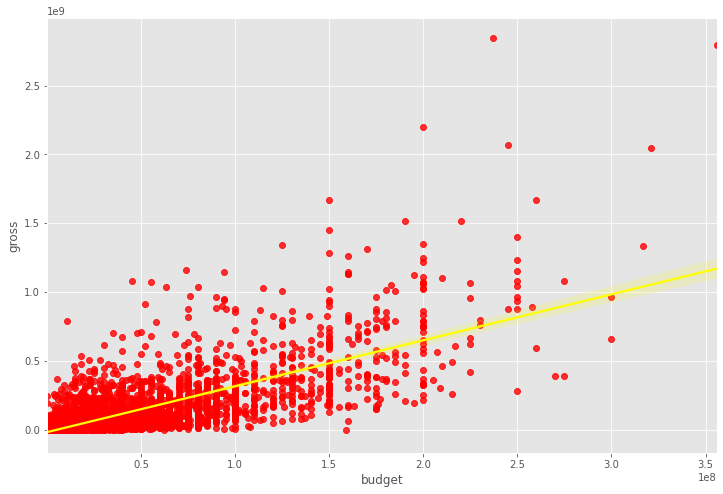

In [333]:
# plot budget v.s gross using seaborn
# No loop matching the specified signature and casting error - convert datatype to float

# df['budget'] = df['budget'].astype('float')
# df['gross'] = df['gross'].astype('float')

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws = {"color": "yellow"})

In [334]:
# correlation
df.corr(method = 'pearson') # only work on numerical fields
# pearson, kendall, spearman
# df.corr(method = 'kendall')
# df.corr(method = 'spearman')


score     votes    budget     gross   runtime
score    1.000000  0.473809  0.071792  0.222143  0.414580
votes    0.473809  1.000000  0.440021  0.614904  0.352437
budget   0.071792  0.440021  1.000000  0.740395  0.318595
gross    0.222143  0.614904  0.740395  1.000000  0.275596
runtime  0.414580  0.352437  0.318595  0.275596  1.000000

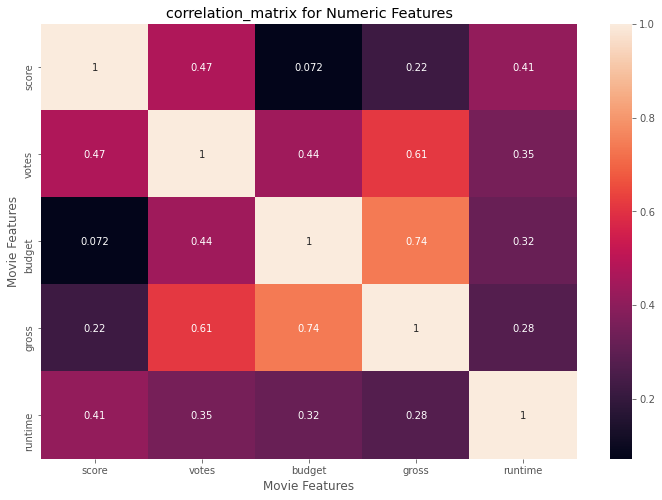

In [335]:
#visualize the corr table

correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title('correlation_matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()


In [336]:
# look at company

df.dtypes
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [337]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype =='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes 

df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
0     4706       6      6     0      1308    8.4   927000.0      1800    2841   
1     3943       6      1     0      1131    5.8    65000.0      1581    1160   
2     3654       4      0     0      1363    8.7  1200000.0       759    1822   
3      205       4      4     0      1131    7.7   221000.0       891    1416   
4      734       6      4     0      1174    7.3   108000.0       721     352   
5     1513       6      9     0      1928    6.4   123000.0      1763    3091   
6     3944       6      0     0      1363    7.9   188000.0       976     578   
7     3134       6      3     0       531    8.2   330000.0      1272    1259   
8     3745       4      0     1      1350    6.8   101000.0      1611    1405   
9     4415       6      3     0      1760    7.0    10000.0      2017     281   
10     333       4      0     0       511    6.1    18000.0       238    2819   
11    4193       4      1     4      2278    7.3    54000.0       819    1302   
12    3041       4      1     0       472    5.3    30000.0      1648    1662   
13    2871       6      6     0      2422    7.7    49000.0      1671    1657   
14    1211       6      5     0      1174    7.1    37000.0       208     351   
15    3566       4      6     0      2300    7.2    27000.0       849    2514   
17      67       4      4     0       531    6.9    29000.0       335    2322   
18    4157       6      9     0       835    6.8    66000.0       945    1489   
20     989       6      5     0       716    6.5    20000.0      2038    3161   
21    1768       6      1     1       118    6.8    14000.0      1310    2070   
22    4142       4      0     0       214    6.7    22000.0       504    2969   
23    5303       4      8     0       438    5.3    12000.0      1659    2499   
28     702       6      5     0      1363    7.2    17000.0      1875    3109   
29     262       6      5     0       669    6.2    22000.0      1492    2365   
33     787       4      6     1       118    6.1      604.0      1148     675   
35    3080       6      4     0      2162    6.2    24000.0       746    2213   
36    4259       6      4     0      1888    6.3     4300.0       583     968   
37    2628       6      4     0      2263    6.0    11000.0      1118    2585   
42    4750       6      0     0      1417    7.1     9000.0      1618    1806   
46    4326       6      0     0      1308    5.3     3900.0      1340    2390   
48    4526       4      0     0      1928    5.1     3100.0       331    2041   
50    3661       4      4     0      2482    7.3    22000.0      2049    3194   
51    2506       6      4     0      2422    6.8     4500.0      1027     304   
53     693       4      0     0      1293    6.1    11000.0       329     770   
56    5207       4      0     0      1634    4.6     2600.0       795    1080   
57    2829       4      4     0      1055    5.4     2400.0       916    2630   
58    4533       6      0     0       262    5.1     5200.0       553    1823   
75    4365       1      1     0      1403    5.8     1300.0       269     941   
77    5254       6      4     0       262    5.9      415.0      1487    1342   
80    2983       6      6     0      2557    4.0      546.0       971    1016   
92    1980       4      0     1      1300    8.4   905000.0      1864    1810   
94     285       6      4     1       315    7.5    97000.0       976    1527   
95    1304       6      0     1      1044    7.2   131000.0       945    1489   
96    4114       2      9     3        46    7.5   192000.0      1740    2715   
97    3043       6      4     2      1573    6.2    40000.0       178     308   
98     604       6      5     1      1166    7.4    47000.0       208     351   
99     863       4      0     1      1300    6.9    42000.0       480     278   
100   1332       6      1     1        11    7.4    59000.0       939    2973   
101   2397       6      0     2      

In [338]:
df.dtypes

name          int16
rating         int8
genre          int8
year           int8
released      int16
score       float64
votes       float64
director      int16
writer        int16
star          int16
country        int8
budget      float64
gross       float64
company       int16
runtime     float64
dtype: object

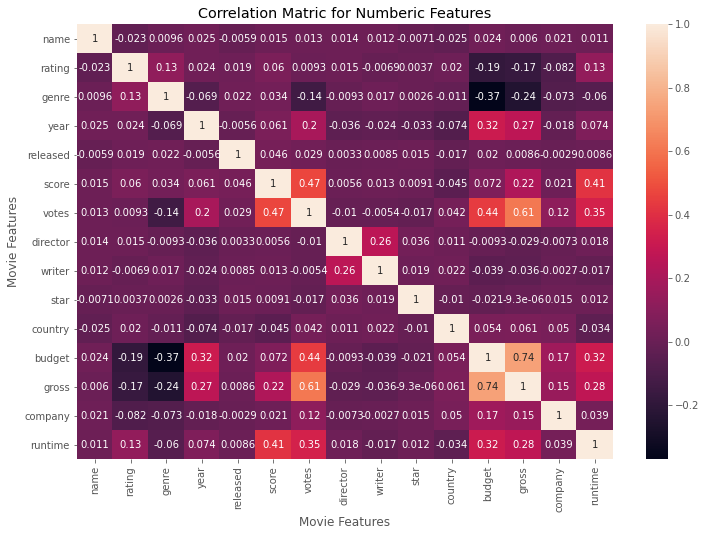

In [339]:

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matric for Numberic Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [340]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name      1.000000 -0.023013  0.009617  0.024734 -0.005896  0.014955   
rating   -0.023013  1.000000  0.128102  0.023634  0.018836  0.059550   
genre     0.009617  0.128102  1.000000 -0.068848  0.021712  0.034061   
year      0.024734  0.023634 -0.068848  1.000000 -0.005625  0.061029   
released -0.005896  0.018836  0.021712 -0.005625  1.000000  0.046424   
score     0.014955  0.059550  0.034061  0.061029  0.046424  1.000000   
votes     0.012915  0.009255 -0.136457  0.202883  0.029029  0.473809   
director  0.013699  0.014847 -0.009303 -0.036281  0.003341  0.005573   
writer    0.011602 -0.006923  0.017500 -0.024397  0.008514  0.012860   
star     -0.007109  0.003737  0.002619 -0.033168  0.015363  0.009121   
country  -0.024555  0.020148 -0.010847 -0.073732 -0.017231 -0.044690   
budget    0.023698 -0.186892 -0.368900  0.320245  0.019888  0.071792   
gross     0.005966 -0.168814 -0.244380  0.268626  0.008614  0.222143   
company   0.021209 -0.082189 -0.073293 -0.017823 -0.002927  0.021054   
runtime   0.010800  0.133239 -0.060186  0.074432  0.008619  0.414580   

             votes  director    writer      star   country    budget  \
name      0.012915  0.013699  0.011602 -0.007109 -0.024555  0.023698   
rating    0.009255  0.014847 -0.006923  0.003737  0.020148 -0.186892   
genre    -0.136457 -0.009303  0.017500  0.002619 -0.010847 -0.368900   
year      0.202883 -0.036281 -0.024397 -0.033168 -0.073732  0.320245   
released  0.029029  0.003341  0.008514  0.015363 -0.017231  0.019888   
score     0.473809  0.005573  0.012860  0.009121 -0.044690  0.071792   
votes     1.000000 -0.010198 -0.005394 -0.017140  0.042146  0.440021   
director -0.010198  1.000000  0.262940  0.036289  0.011108 -0.009340   
writer   -0.005394  0.262940  1.000000  0.019273  0.022153 -0.039420   
star     -0.017140  0.036289  0.019273  1.000000 -0.010135 -0.021282   
country   0.042146  0.011108  0.022153 -0.010135  1.000000  0.054372   
budget    0.440021 -0.009340 -0.039420 -0.021282  0.054372  1.000000   
gross     0.614904 -0.029366 -0.035999 -0.000009  0.060929  0.740395   
company   0.119366 -0.007337 -0.002658  0.015086  0.049559  0.171385   
runtime   0.352437  0.018082 -0.016672  0.012439 -0.033554  0.318595   

             gross   company   runtime  
name      0.005966  0.021209  0.010800  
rating   -0.168814 -0.082189  0.133239  
genre    -0.244380 -0.073293 -0.060186  
year      0.268626 -0.017823  0.074432  
released  0.008614 -0.002927  0.008619  
score     0.222143  0.021054  0.414580  
votes     0.614904  0.119366  0.352437  
director -0.029366 -0.007337  0.018082  
writer   -0.035999 -0.002658 -0.016672  
star     -0.000009  0.015086  0.012439  
country   0.060929  0.049559 -0.033554  
budget    0.740395  0.171385  0.318595  
gross     1.000000  0.150233  0.275596  
company   0.150233  1.000000  0.038752  
runtime   0.275596  0.038752  1.000000

In [341]:
# view the correlation 
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.023013
          genre       0.009617
          year        0.024734
          released   -0.005896
          score       0.014955
          votes       0.012915
          director    0.013699
          writer      0.011602
          star       -0.007109
          country    -0.024555
          budget      0.023698
          gross       0.005966
          company     0.021209
          runtime     0.010800
rating    name       -0.023013
          rating      1.000000
          genre       0.128102
          year        0.023634
          released    0.018836
          score       0.059550
          votes       0.009255
          director    0.014847
          writer     -0.006923
          star        0.003737
          country     0.020148
          budget     -0.186892
          gross      -0.168814
          company    -0.082189
          runtime     0.133239
genre     name        0.009617
          rating      0.128102
        

In [342]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre     budget     -0.368900
budget    genre      -0.368900
genre     gross      -0.244380
gross     genre      -0.244380
rating    budget     -0.186892
budget    rating     -0.186892
gross     rating     -0.168814
rating    gross      -0.168814
genre     votes      -0.136457
votes     genre      -0.136457
rating    company    -0.082189
company   rating     -0.082189
country   year       -0.073732
year      country    -0.073732
genre     company    -0.073293
company   genre      -0.073293
genre     year       -0.068848
year      genre      -0.068848
runtime   genre      -0.060186
genre     runtime    -0.060186
country   score      -0.044690
score     country    -0.044690
budget    writer     -0.039420
writer    budget     -0.039420
year      director   -0.036281
director  year       -0.036281
writer    gross      -0.035999
gross     writer     -0.035999
runtime   country    -0.033554
country   runtime    -0.033554
year      star       -0.033168
star      year       -0.033168
gross   

In [343]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.614904
votes     gross       0.614904
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [344]:
# Vptes and budget have the highest correlation to gross earning
# company has low correlation